In [1]:
import sys, os
module_path = os.path.abspath(os.path.join('..'))

if module_path not in sys.path:
    sys.path.append(module_path)

# move directory
os.chdir("..")

In [2]:
import pandas as pd

df_pf = pd.read_csv("./dataset/KSTAR_rl_PF_control_ts_data.csv").drop(axis = 1, columns = ['Unnamed: 0'])
df = pd.read_csv("./dataset/KSTAR_rl_control_ts_data.csv").drop(axis = 1, columns = ['Unnamed: 0'])
df_pf.head()

,\ipmhd,time,\PCPF1U,\PCPF2U,\PCPF3U,\PCPF3L,\PCPF4U,\PCPF4L,\PCPF5U,\PCPF5L,\PCPF6U,\PCPF6L,\PCPF7U,shot
0,-322074.68750,0.65,-2389.800049,-1712.000000,-6541.600098,-6557.200195,-8430.799805,-8431.400391,-3295.999512,-3305.600098,1093.999512,1091.199951,1345.000000,15139
1,-343679.68750,0.70,-2073.399902,-1241.800049,-6464.200195,-6450.200195,-8457.200195,-8457.800781,-3280.600098,-3277.399902,1260.800049,1259.800049,1442.599976,15139
2,-365148.15625,0.75,-1791.399658,-787.200012,-6363.200195,-6370.400391,-8470.399414,-8476.800781,-3247.802246,-3246.199951,1423.000977,1406.199219,1549.000488,15139
3,-386671.93750,0.80,-1469.799561,-331.399994,-6276.200195,-6279.399902,-8517.399414,-8498.599609,-3233.601318,-3256.600098,1580.200562,1578.002197,1657.201538,15139
4,-404271.81250,0.85,-1276.199707,223.600006,-6084.799805,-6080.999023,-8500.599609,-8498.799805,-3160.599365,-3165.398926,1589.801514,1568.801025,1763.198486,15139


In [3]:
pfc_cols = ['\PCPF1U', '\PCPF2U', '\PCPF3U', '\PCPF3L', '\PCPF4U','\PCPF4L', '\PCPF5U', '\PCPF5L', '\PCPF6U', '\PCPF6L', '\PCPF7U']
general_cols = [
       '\\q0','\\q95', '\\ipmhd', '\\kappa', '\\tritop', '\\tribot',
       '\\betap', '\\betan', '\li', '\\bcentr', '\\rsurf', '\\aminor', '\\nb11_pnb',
       '\\nb12_pnb', '\\nb13_pnb', '\EC1_PWR', '\EC2_PWR', '\EC3_PWR',
       '\EC4_PWR', '\EC5_PWR', '\ECSEC1TZRTN', '\ECSEC2TZRTN', '\ECSEC3TZRTN',
       '\ECSEC4TZRTN', '\ECSES5TZRTN', '\\ne_inter01', '\\ne_tci01', '\\ne_tci02',
       '\\ne_tci03', '\\ne_tci04', '\\ne_tci05'
]

In [4]:
df.head()

,\q0,time,\q95,\ipmhd,\kappa,\tritop,\tribot,\betap,\betan,\li,...,\ECSEC3TZRTN,\ECSEC4TZRTN,\ECSES5TZRTN,\ne_inter01,\ne_tci01,\ne_tci02,\ne_tci03,\ne_tci04,\ne_tci05,shot
0,6.432839,0.65,5.040257,-322074.68750,1.226828,0.075227,0.075227,0.485897,0.533134,0.599291,...,0.0,0.0,NaN,2.010937,NaN,NaN,NaN,NaN,NaN,15139
1,4.698993,0.70,4.720756,-343679.68750,1.233438,0.073254,0.073254,0.473970,0.552309,0.659758,...,0.0,0.0,NaN,2.213481,NaN,NaN,NaN,NaN,NaN,15139
2,3.601305,0.75,4.451027,-365148.15625,1.239089,0.093913,0.072963,0.456540,0.562570,0.714314,...,0.0,0.0,NaN,2.394498,NaN,NaN,NaN,NaN,NaN,15139
3,2.965794,0.80,4.229524,-386671.93750,1.246113,0.126138,0.094714,0.443476,0.574558,0.756148,...,0.0,0.0,NaN,2.575459,NaN,NaN,NaN,NaN,NaN,15139
4,2.718132,0.85,4.131131,-404271.81250,1.255462,0.113241,0.113241,0.438204,0.585356,0.777865,...,0.0,0.0,NaN,2.710065,NaN,NaN,NaN,NaN,NaN,15139


In [5]:
import glob2
import os

npz_path = "./dataset/PF_data/"
npz_path_list = glob2.glob(os.path.join(npz_path, "*"))

npz_shot_list = []
for path in npz_path_list:
    shot_num = int(path.split("_")[1].split("/")[-1][1:])
    npz_shot_list.append(shot_num)
    
import numpy as np

npz_shot_list = np.unique(npz_shot_list)

df_pf.shot.unique()

array([15139, 15140, 15141, ..., 31994, 31995, 31996])

In [5]:
from scipy.interpolate import interp2d
from tqdm.auto import tqdm

for path in tqdm(npz_path_list):
    data = np.load(path)
    psi = data['psi']
    R = data['R']
    Z = data['Z']
    
    if psi.shape[0] != 65:
        
        interp_fn = interp2d(R,Z, psi, kind = 'cubic')
        
        R_new = np.linspace(R.min(), R.max(), 65, endpoint = True)
        Z_new = np.linspace(R.min(), R.max(), 65, endpoint = True)
        
        RR, ZZ = np.meshgrid(R_new, Z_new)
        PSI = interp_fn(R_new, Z_new).reshape(65, 65)
        np.save(path, psi = psi, R = RR, Z = ZZ)
    else:
        continue

  0%|          | 0/8681 [00:00<?, ?it/s]

In [6]:
df_pf['time'] = df_pf.time.round(decimals=3)
df['time'] = df.time.round(decimals=3)

In [7]:
df_shot_list = df_pf.shot.unique()

shot_list = []
time_list = []
params_list = []
pfc_list = []
path_list = []

for path in npz_path_list:
    shot_num = int(path.split("_")[1].split("/")[-1][1:])
    time = int(path.split("_")[-1].split(".")[0])
    time = float(time / 1000)
    
    if shot_num not in df_shot_list:
        continue
    
    if time not in df_pf[df_pf.shot == shot_num].time.values or time not in df[df.shot == shot_num].time.values:
        continue
    
    df_pf_shot = df_pf[df_pf.shot == shot_num]
    df_shot = df[df.shot == shot_num]
    
    pfc=df_pf_shot[df_pf_shot.time == time][pfc_cols].values.reshape(1,-1)
    params = df_shot[df_shot.time == time][general_cols].values.reshape(1,-1)
    
    shot_list.append(shot_num)
    time_list.append(time)
    
    params_list.append(params)
    pfc_list.append(pfc)
    
    path_list.append(path)

new_df = pd.DataFrame({
    "shot" : shot_list,
    "time" : time_list,
    "path" : path_list,
})

new_df[general_cols] = np.concatenate(params_list, axis = 0)
new_df[pfc_cols] = np.concatenate(pfc_list, axis = 0)

In [8]:
print("# of new_df : ", len(new_df))
new_df.head()

# of new_df :  1788


,shot,time,path,\q0,\q95,\ipmhd,\kappa,\tritop,\tribot,\betap,...,\PCPF2U,\PCPF3U,\PCPF3L,\PCPF4U,\PCPF4L,\PCPF5U,\PCPF5L,\PCPF6U,\PCPF6L,\PCPF7U
0,21609,8.65,./dataset/PF_data/g021609_008650.npz,1.866944,4.827658,-499157.750000,1.703454,0.353956,0.858638,1.234863,...,990.200012,-5013.799805,-4848.600098,-4017.399902,-4366.799805,-2928.399902,-4006.000000,3265.000000,3840.000000,1164.400024
1,21756,13.20,./dataset/PF_data/g021756_013200.npz,3.882746,9.755101,-397742.312500,1.857237,0.398770,0.859662,2.482233,...,-3228.600098,-4240.000000,-4123.799805,-3645.000000,-3731.800049,-6196.799805,-6670.399902,2041.199951,2251.000000,2205.600098
2,21522,0.45,./dataset/PF_data/g021522_000450.npz,5.065367,14.086168,-219501.343750,1.849363,0.305682,0.675747,0.444351,...,-1729.199585,-9153.599609,-9132.599609,-9900.000977,-9887.799805,-5621.799805,-5603.600586,680.999451,716.799927,820.399597
3,20564,0.47,./dataset/PF_data/g020564_000470.npz,9.413092,9.704045,-184198.234375,1.245446,0.101543,0.149606,1.228049,...,-1396.800049,-6575.200195,-6585.799805,-7722.799805,-7700.399902,-3133.000000,-3141.799805,570.000122,566.200012,741.799988
4,20830,10.35,./dataset/PF_data/g020830_010350.npz,0.717523,4.944883,-481981.406250,1.700108,0.435942,0.828272,1.126539,...,-1419.800171,-3984.800293,-4100.796875,-583.405151,-894.202332,-1874.936157,-2103.793945,8.998726,234.926315,4881.799316


In [9]:
new_df.to_csv("./dataset/KSTAR_rl_GS_solver.csv", index = False)

In [10]:
df = pd.read_csv("./dataset/KSTAR_rl_control_ts_data.csv")
df.head()

,Unnamed: 0,\q0,time,\q95,\ipmhd,\kappa,\tritop,\tribot,\betap,\betan,...,\ECSEC3TZRTN,\ECSEC4TZRTN,\ECSES5TZRTN,\ne_inter01,\ne_tci01,\ne_tci02,\ne_tci03,\ne_tci04,\ne_tci05,shot
0,0,6.432839,0.65,5.040257,-322074.68750,1.226828,0.075227,0.075227,0.485897,0.533134,...,0.0,0.0,NaN,2.010937,NaN,NaN,NaN,NaN,NaN,15139
1,1,4.698993,0.70,4.720756,-343679.68750,1.233438,0.073254,0.073254,0.473970,0.552309,...,0.0,0.0,NaN,2.213481,NaN,NaN,NaN,NaN,NaN,15139
2,2,3.601305,0.75,4.451027,-365148.15625,1.239089,0.093913,0.072963,0.456540,0.562570,...,0.0,0.0,NaN,2.394498,NaN,NaN,NaN,NaN,NaN,15139
3,3,2.965794,0.80,4.229524,-386671.93750,1.246113,0.126138,0.094714,0.443476,0.574558,...,0.0,0.0,NaN,2.575459,NaN,NaN,NaN,NaN,NaN,15139
4,4,2.718132,0.85,4.131131,-404271.81250,1.255462,0.113241,0.113241,0.438204,0.585356,...,0.0,0.0,NaN,2.710065,NaN,NaN,NaN,NaN,NaN,15139


In [11]:
cols = list(df.columns)
cols.remove('Unnamed: 0')

In [12]:
print("# of data in PF coil current : {}".format(len(df_pf)))
print("# of data in ts data : {}".format(len(df)))

# of data in PF coil current : 1834561
# of data in ts data : 1834561


In [13]:
cols_PCPF = ['shot','\PCPF1U', '\PCPF2U', '\PCPF3U', '\PCPF3L', '\PCPF4U', '\PCPF4L', '\PCPF5U', '\PCPF5L', '\PCPF6U','\PCPF6L', '\PCPF7U']
df_merged = pd.concat([df[cols], df_pf[cols_PCPF]], join = 'outer', axis = 1)

In [14]:
print("# of merged data : {}".format(len(df_merged)))
df_merged.head()

# of merged data : 1834561


,\q0,time,\q95,\ipmhd,\kappa,\tritop,\tribot,\betap,\betan,\li,...,\PCPF2U,\PCPF3U,\PCPF3L,\PCPF4U,\PCPF4L,\PCPF5U,\PCPF5L,\PCPF6U,\PCPF6L,\PCPF7U
0,6.432839,0.65,5.040257,-322074.68750,1.226828,0.075227,0.075227,0.485897,0.533134,0.599291,...,-1712.000000,-6541.600098,-6557.200195,-8430.799805,-8431.400391,-3295.999512,-3305.600098,1093.999512,1091.199951,1345.000000
1,4.698993,0.70,4.720756,-343679.68750,1.233438,0.073254,0.073254,0.473970,0.552309,0.659758,...,-1241.800049,-6464.200195,-6450.200195,-8457.200195,-8457.800781,-3280.600098,-3277.399902,1260.800049,1259.800049,1442.599976
2,3.601305,0.75,4.451027,-365148.15625,1.239089,0.093913,0.072963,0.456540,0.562570,0.714314,...,-787.200012,-6363.200195,-6370.400391,-8470.399414,-8476.800781,-3247.802246,-3246.199951,1423.000977,1406.199219,1549.000488
3,2.965794,0.80,4.229524,-386671.93750,1.246113,0.126138,0.094714,0.443476,0.574558,0.756148,...,-331.399994,-6276.200195,-6279.399902,-8517.399414,-8498.599609,-3233.601318,-3256.600098,1580.200562,1578.002197,1657.201538
4,2.718132,0.85,4.131131,-404271.81250,1.255462,0.113241,0.113241,0.438204,0.585356,0.777865,...,223.600006,-6084.799805,-6080.999023,-8500.599609,-8498.799805,-3160.599365,-3165.398926,1589.801514,1568.801025,1763.198486


In [15]:
df_merged.to_csv("./dataset/KSTAR_rl_data.csv")

In [16]:
df_merged.describe()

,\q0,time,\q95,\ipmhd,\kappa,\tritop,\tribot,\betap,\betan,\li,...,\PCPF2U,\PCPF3U,\PCPF3L,\PCPF4U,\PCPF4L,\PCPF5U,\PCPF5L,\PCPF6U,\PCPF6L,\PCPF7U
count,1.834561e+06,1.834561e+06,1.834561e+06,1.834561e+06,1.834561e+06,1.834561e+06,1.834561e+06,1.834561e+06,1.834561e+06,1.834561e+06,...,1.834561e+06,1.834561e+06,1.834561e+06,1.834561e+06,1.834561e+06,1.834561e+06,1.834561e+06,1.834561e+06,1.834561e+06,1.834561e+06
mean,1.748434e+22,7.158506e+00,5.999446e+00,-5.037346e+05,1.637196e+00,3.675895e-01,6.025471e-01,-1.485063e+10,9.653416e+09,3.494539e+27,...,2.143714e+03,-4.186788e+03,-3.894831e+03,-5.885452e+03,-5.749063e+03,-2.491917e+03,-3.100781e+03,1.731561e+03,1.935618e+03,2.882246e+03
std,1.341448e+25,7.757165e+00,2.090274e+01,1.251701e+05,1.830061e-01,1.926090e-01,2.748882e-01,3.685419e+13,1.015584e+13,3.676247e+30,...,3.677703e+03,4.281640e+03,4.236342e+03,4.673958e+03,4.605697e+03,3.639043e+03,3.676394e+03,1.545615e+03,1.675110e+03,1.585636e+03
min,3.242377e-03,5.060000e-02,9.058772e-05,-1.163418e+07,2.426789e-01,-9.571875e-01,-8.889332e-01,-4.739920e+16,-2.058268e+09,0.000000e+00,...,-1.499540e+04,-1.519720e+04,-1.553940e+04,-1.522399e+04,-1.522960e+04,-1.516460e+04,-1.512220e+04,-8.498400e+03,-8.655400e+03,-1.212560e+04
25%,1.061016e+00,2.650001e+00,4.239110e+00,-5.680432e+05,1.557269e+00,2.607208e-01,3.012571e-01,6.210026e-01,7.537442e-01,9.416918e-01,...,-2.138000e+02,-6.862400e+03,-6.715200e+03,-9.234798e+03,-9.120401e+03,-4.970831e+03,-5.589733e+03,8.548000e+02,9.892001e+02,1.866600e+03
50%,1.434851e+00,5.350001e+00,4.989482e+00,-5.087735e+05,1.699685e+00,3.421751e-01,7.349668e-01,1.224856e+00,1.477848e+00,1.063706e+00,...,1.390200e+03,-5.255604e+03,-4.938800e+03,-7.214400e+03,-7.096999e+03,-3.510000e+03,-3.960400e+03,1.720200e+03,1.907000e+03,2.826400e+03
75%,1.870463e+00,8.950003e+00,5.860354e+00,-4.562408e+05,1.752327e+00,4.259450e-01,8.270055e-01,1.642436e+00,1.928289e+00,1.297438e+00,...,3.850600e+03,-2.048783e+03,-1.751000e+03,-3.739800e+03,-3.624598e+03,-9.592000e+02,-1.567015e+03,2.643397e+03,2.905071e+03,3.767200e+03
max,1.374690e+28,9.249997e+01,5.011832e+03,2.720422e+06,2.295000e+00,1.000000e+00,1.000000e+00,1.465805e+16,1.287984e+16,4.662292e+33,...,1.596220e+04,1.519300e+04,1.566020e+04,1.559920e+04,1.569980e+04,1.501039e+04,1.500740e+04,1.502360e+04,1.502200e+04,1.004160e+04


In [17]:
from src.GSsolver.dataset import PINNDataset
from src.config import Config
from torch.utils.data import DataLoader

config = Config()
cols_0D = config.input_params['GS-solver']['state']
cols_PFC = config.input_params['GS-solver']['control']
df = pd.read_csv("./dataset/KSTAR_rl_GS_solver.csv")
data = PINNDataset(df, cols_0D, cols_PFC)
dataloader = DataLoader(data, batch_size = 1, num_workers=1, pin_memory=False, drop_last=True, shuffle=True)

In [174]:
sample_data, sample_target = next(iter(dataloader))

In [175]:
psi = sample_target.permute((1,2,0)).numpy()

In [176]:
rzbdys = sample_data['rzbdys'].squeeze(0).numpy()

In [177]:
sample = np.load("./src/GSsolver/toy_dataset/g028911_004060.npz")
R = sample['R']
Z = sample['Z']

In [178]:
R.shape

(65, 65)

In [179]:
psi.shape

(65, 65, 1)

<ipython-input-200-fec80fba0e72>:2: UserWarning: The following kwargs were not used by contour: 'level'
  plt.contourf(R,Z,psi.squeeze(2), level = 32)


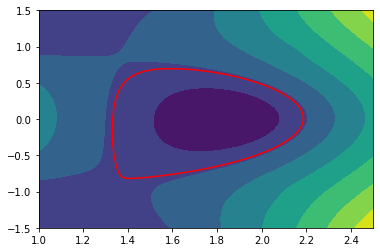

In [200]:
import matplotlib.pyplot as plt
plt.contourf(R,Z,psi.squeeze(2), level = 32)
plt.plot(rzbdys[:,0], rzbdys[:,1], c = 'r')

In [201]:
rc = 0.5 * (min(rzbdys[:,0]) + max(rzbdys[:,0]))
ind = rzbdys[:,0].argmax()
zc = rzbdys[ind, 1]

amin = 0.5 * (min(rzbdys[:,0]) - max(rzbdys[:,0]))

r = np.sqrt((rzbdys[:,0] - rc) ** 2 + (rzbdys[:,1] - zc) ** 2)
theta = np.arctan2((rzbdys[:,1] - zc), (rzbdys[:,0] - rc))

In [202]:
print(r[0:10])
print(theta[0:10])

[0.4281721  0.4282182  0.42830417 0.4287414  0.42942333 0.43002504
 0.4305151  0.4311904  0.4321984  0.43330762]
[0.         0.02463986 0.04927971 0.07391954 0.0985594  0.12319925
 0.1478391  0.17247897 0.19711883 0.22175868]


In [206]:
theta_new = np.linspace(0, 2 * 3.141, 256)

In [211]:
x1 = r * np.sin(theta)
x2 = r * np.sin(theta_new)

In [214]:
x1-x2

array([ 0.00000000e+00,  1.95347873e-06,  3.90191978e-06,  5.84137002e-06,
        7.78923243e-06,  9.72112490e-06,  1.16400026e-05,  1.35544389e-05,
        1.54581686e-05,  1.73452099e-05,  1.92340424e-05,  2.10302222e-05,
        2.28585691e-05,  2.46744341e-05,  2.64398047e-05,  2.81332271e-05,
        2.98378597e-05,  3.14880756e-05,  3.31350743e-05,  3.46700932e-05,
        3.62614986e-05,  3.76704202e-05,  3.91099188e-05,  4.04851687e-05,
        4.17438196e-05,  4.30814068e-05,  4.42619344e-05,  4.54359599e-05,
        4.63876848e-05,  4.73603590e-05,  4.83341745e-05,  4.91670081e-05,
        4.98596671e-05,  5.05550922e-05,  5.10090284e-05,  5.14740173e-05,
        5.17964162e-05,  5.20285350e-05,  5.22212169e-05,  5.22208327e-05,
        5.20454644e-05,  5.18906140e-05,  5.14783805e-05,  5.10270866e-05,
        5.03354011e-05,  4.95597378e-05,  4.86544296e-05,  4.75178474e-05,
        4.62678821e-05,  4.48458293e-05,  4.32585575e-05,  4.14156671e-05,
        3.94494192e-05,  

In [199]:
2 * 3.14 / 255

0.02462745098039216

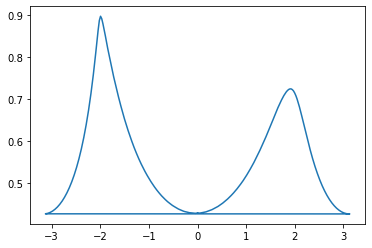

In [193]:
plt.plot(theta, r)

In [83]:
sample_data, sample_target = next(iter(dataloader))
psi = sample_target

x = psi.unsqueeze(0)
a = np.array([[1,0,-1],[2,0,-2],[1,0,-1]])

import torch
conv1 = torch.nn.Conv2d(1,1,kernel_size = 3, stride = 1, padding = 1, bias = False)
conv1.weight = torch.nn.Parameter(torch.from_numpy(a).float().unsqueeze(0).unsqueeze(0))
G_x = conv1(torch.autograd.Variable(x)).data.view(1, x.shape[2], x.shape[3])

b=np.array([[1, 2, 1],[0,0,0],[-1,-2,-1]])
conv2=torch.nn.Conv2d(1, 1, kernel_size=3, stride=1, padding=1, bias=False)
conv2.weight=torch.nn.Parameter(torch.from_numpy(b).float().unsqueeze(0).unsqueeze(0))
G_y=conv2(torch.autograd.Variable(x)).data.view(1, x.shape[2], x.shape[3])

G=torch.sqrt(torch.pow(G_x,2)+ torch.pow(G_y,2))

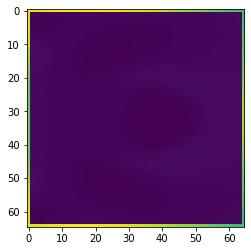

In [90]:
grad = G.squeeze(0).numpy()
plt.imshow(grad)

In [118]:
R[0,:]

array([1.       , 1.0234375, 1.046875 , 1.0703125, 1.09375  , 1.1171875,
       1.140625 , 1.1640625, 1.1875   , 1.2109375, 1.234375 , 1.2578125,
       1.28125  , 1.3046875, 1.328125 , 1.3515625, 1.375    , 1.3984375,
       1.421875 , 1.4453125, 1.46875  , 1.4921875, 1.515625 , 1.5390625,
       1.5625   , 1.5859375, 1.609375 , 1.6328125, 1.65625  , 1.6796875,
       1.703125 , 1.7265625, 1.75     , 1.7734375, 1.796875 , 1.8203125,
       1.84375  , 1.8671875, 1.890625 , 1.9140625, 1.9375   , 1.9609375,
       1.984375 , 2.0078125, 2.03125  , 2.0546875, 2.078125 , 2.1015625,
       2.125    , 2.1484375, 2.171875 , 2.1953125, 2.21875  , 2.2421875,
       2.265625 , 2.2890625, 2.3125   , 2.3359375, 2.359375 , 2.3828125,
       2.40625  , 2.4296875, 2.453125 , 2.4765625, 2.5      ])

In [119]:
Z[:,0]

array([-1.5     , -1.453125, -1.40625 , -1.359375, -1.3125  , -1.265625,
       -1.21875 , -1.171875, -1.125   , -1.078125, -1.03125 , -0.984375,
       -0.9375  , -0.890625, -0.84375 , -0.796875, -0.75    , -0.703125,
       -0.65625 , -0.609375, -0.5625  , -0.515625, -0.46875 , -0.421875,
       -0.375   , -0.328125, -0.28125 , -0.234375, -0.1875  , -0.140625,
       -0.09375 , -0.046875,  0.      ,  0.046875,  0.09375 ,  0.140625,
        0.1875  ,  0.234375,  0.28125 ,  0.328125,  0.375   ,  0.421875,
        0.46875 ,  0.515625,  0.5625  ,  0.609375,  0.65625 ,  0.703125,
        0.75    ,  0.796875,  0.84375 ,  0.890625,  0.9375  ,  0.984375,
        1.03125 ,  1.078125,  1.125   ,  1.171875,  1.21875 ,  1.265625,
        1.3125  ,  1.359375,  1.40625 ,  1.453125,  1.5     ])

In [161]:
def find_indices(rzbdys, R, Z):
    result = []
    for idx in range(len(rzbdys)):
        x = rzbdys[idx,0]
        y = rzbdys[idx,1]
        
        r_idx = np.argmin((R-x) ** 2)
        z_idx = np.argmin((Z-y) ** 2)
        result.append([r_idx, z_idx])
    
    return result

indices = find_indices(rzbdys.squeeze(0).numpy(), R[0,:], Z[:,0])

In [168]:
mask = np.zeros_like(R)

for (r_idx, z_idx) in indices:
    # mask[z_idx, r_idx] = 1
    pass

In [169]:
mask[np.array(indices)] = 1

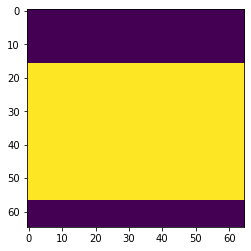

In [170]:
plt.imshow(mask[:,:,np.newaxis])

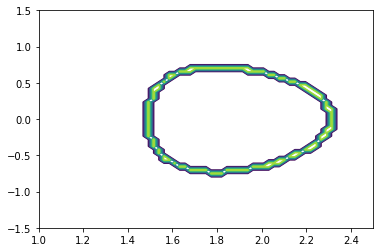

In [157]:
plt.contour(R,Z,mask)

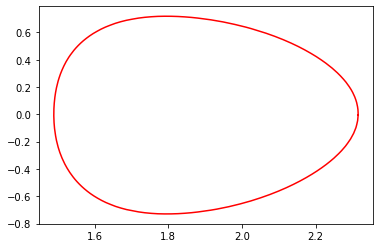

In [156]:
plt.plot(rzbdys.squeeze(0)[:,0], rzbdys.squeeze(0)[:,1], c = 'r')